# Yelp Data Challenge 
## Part II - NLP

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('yelp_dataset/last_3_years_restaurant_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,27,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


In [4]:
df.shape

(558887, 13)

In [5]:
df['review_cnt'] = df.groupby(['business_id'])['review_id'].transform('count')

In [6]:
df['review_cnt'].quantile(q=[0.5,0.75,0.90])

0.50     292.0
0.75     609.0
0.90    1289.0
Name: review_cnt, dtype: float64

In [7]:
import matplotlib.pyplot as plt

% matplotlib inline

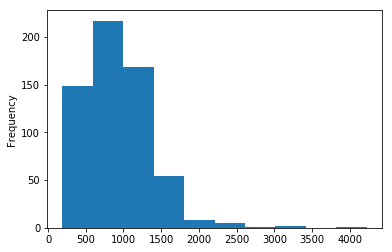

In [8]:
df['review_cnt'].value_counts().plot.hist()

### Define feature variables, here is the text of the review

In [9]:
documents = df['text']

In [10]:
# get non na indx
indx = pd.notnull(documents)

In [11]:
documents = documents[indx]

In [12]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = documents.values

In [13]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
documents[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was a 

### Define target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558887 entries, 0 to 558886
Data columns (total 14 columns):
Unnamed: 0     558887 non-null int64
business_id    558887 non-null object
name           558887 non-null object
categories     558887 non-null object
avg_stars      558887 non-null float64
cool           558887 non-null int64
date           558887 non-null object
funny          558887 non-null int64
review_id      558887 non-null object
stars          558887 non-null int64
text           558887 non-null object
useful         558887 non-null int64
user_id        558887 non-null object
review_cnt     558887 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 59.7+ MB


In [15]:
#checking summary statisics for avg_star and stars
var_list = [u'avg_stars',u'stars',u'cool',u'funny',u'useful']
df[var_list].describe()

,avg_stars,stars,cool,funny,useful
count,558887.000000,558887.000000,558887.000000,558887.000000,558887.000000
mean,3.837571,3.830969,0.601354,0.440094,0.961928
std,0.596554,1.426476,2.949648,2.237619,3.448605
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.500000,3.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,0.000000,0.000000,1.000000
max,5.000000,5.000000,227.000000,202.000000,236.000000


In [16]:
# Make a column and take the values, save to a variable named "target"
# tried cutoff >3, pos/neg around 7:3; cutoff > 4, pos/neg around 1:1
#condition1 = (df['stars']>3)
#df_reduced.drop(['is_pos_review'],axis=1,inplace=True)

In [17]:
df['is_pos_review'] = (df['stars']>4)

In [18]:
df['is_pos_review'].value_counts(normalize=True)

False    0.518158
True     0.481842
Name: is_pos_review, dtype: float64

In [19]:
target = df['is_pos_review'].values

In [20]:
target = target[indx]

In [21]:
target[:10]

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True])

#### You may want to look at the statistic of the target variable

In [24]:
# To be implemented
#checking positive reviews's avg_stars rating
df[df['is_pos_review']==True]['avg_stars'].mean()

4.0331309530440596

In [25]:
documents.size,target.size

(558887, 558887)

## Let's create training dataset and test dataset

In [26]:
from sklearn.cross_validation import train_test_split

/Users/jieluo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
# Documents is your X, target is your y
# Now split the data to training set and test set

In [28]:
# Split to documents_train, documents_test, target_train, target_test
# using test_size 0.8 to reduce the training size due to computational cost
documents_train,documents_test,target_train,target_test = train_test_split(documents,target,test_size=0.2, random_state=0)

## Let's get NLP representation of the documents

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000,min_df=1)

In [31]:
# Train the model with your training data
x_train = vectorizer.fit_transform(documents_train).toarray()

In [32]:
# Get the vocab of your tfidf
features_name = vectorizer.get_feature_names()

In [33]:
# Use the trained model to transform your test data
x_test = vectorizer.transform(documents_test).toarray()

##### using 2-gram of words

In [34]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer2 = TfidfVectorizer(stop_words='english',max_features=5000,min_df=1,ngram_range=(1, 2))
x_train2 = vectorizer2.fit_transform(documents_train).toarray()
features_name2 = vectorizer2.get_feature_names()
x_test2 = vectorizer2.transform(documents_test).toarray()

## Similar review search engine

In [35]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]


In [36]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
# Draw an arbitrary review from test (unseen in training) documents
sample_review = [documents_test[10]]
sample_review

['In all fairness I am not a fan of fast food, but with 8 minutes to spare before my flight began boarding at gate C2 I figured this was my best bet to grab something quick... \n\nI ordered a whopper junior without meat (literally just the bun and standard accoutrements), a large order of fries, and a bottle of water. The guy who took my order told me I could not have a large order of fries - only medium - since that\'s the way the meal came... I clarified and said I didn\'t order the meal - he said it didn\'t matter - this is what he rang up, and the meal comes with a medium order of fries... okay fine, whatever... He also asked me why I wanted a water since the meal came with a soda........... \n\nThe total for my "meal" was $13.85. For fast food that you can\'t customize - even at an airport - this is a rip-off. (The minimum wage in Nevada is $8.25/hour). Just to compare to another chain in a different state - at Wendy\'s at the Dallas Fort Worth airport in Texas you can get the sam

In [38]:
# Transform the drawn review(s) to vector(s)
vector_review = vectorizer.transform(sample_review).toarray()

In [39]:
vector_review2 = vectorizer2.transform(sample_review).toarray()

In [40]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(vector_review, x_test[:100])

In [41]:
similarity_scores2 = cosine_similarity(vector_review2,x_test2[:100])

In [42]:
similarity_scores[0]

array([0.04608687, 0.01329101, 0.02508309, 0.        , 0.03395274,
       0.03127091, 0.02767003, 0.05882241, 0.03636423, 0.04897751,
       1.        , 0.03486838, 0.03451679, 0.00557687, 0.00985423,
       0.01024591, 0.07242841, 0.09216546, 0.01427506, 0.05235901,
       0.06310268, 0.01865698, 0.04020689, 0.        , 0.10153174,
       0.00391333, 0.02551222, 0.01942228, 0.        , 0.05318553,
       0.03329955, 0.0144619 , 0.04109639, 0.06867114, 0.0860013 ,
       0.08878456, 0.00862627, 0.05006797, 0.00613289, 0.00940672,
       0.        , 0.0188028 , 0.06583869, 0.        , 0.02537102,
       0.        , 0.01566739, 0.04563689, 0.0121663 , 0.02753151,
       0.00544705, 0.12886495, 0.10718202, 0.02085973, 0.04485053,
       0.0202851 , 0.00330039, 0.05826833, 0.05788075, 0.04514091,
       0.00358333, 0.04482682, 0.06417873, 0.01471101, 0.13714524,
       0.01635658, 0.04320894, 0.00658174, 0.05630024, 0.0491928 ,
       0.01196531, 0.04092118, 0.        , 0.03461121, 0.04949

In [43]:
# Let's find top 5 similar reviews
n = 5
top_similar_review = get_top_values(similarity_scores[0], n, documents_test[:100])

In [44]:
n = 5
top_similar_review2 = get_top_values(similarity_scores2[0],n,documents_test[:100])

In [45]:
print('Our search query:')
print(sample_review) # To be added

Our search query:
['In all fairness I am not a fan of fast food, but with 8 minutes to spare before my flight began boarding at gate C2 I figured this was my best bet to grab something quick... \n\nI ordered a whopper junior without meat (literally just the bun and standard accoutrements), a large order of fries, and a bottle of water. The guy who took my order told me I could not have a large order of fries - only medium - since that\'s the way the meal came... I clarified and said I didn\'t order the meal - he said it didn\'t matter - this is what he rang up, and the meal comes with a medium order of fries... okay fine, whatever... He also asked me why I wanted a water since the meal came with a soda........... \n\nThe total for my "meal" was $13.85. For fast food that you can\'t customize - even at an airport - this is a rip-off. (The minimum wage in Nevada is $8.25/hour). Just to compare to another chain in a different state - at Wendy\'s at the Dallas Fort Worth airport in Texas y

In [46]:
print('Most %s similar reviews:' % n)
for i in range(len(top_similar_review)):
    print ('top %s review:' % i)
    print (top_similar_review[i])
 # To be added

Most 5 similar reviews:
top 0 review:
In all fairness I am not a fan of fast food, but with 8 minutes to spare before my flight began boarding at gate C2 I figured this was my best bet to grab something quick... 

I ordered a whopper junior without meat (literally just the bun and standard accoutrements), a large order of fries, and a bottle of water. The guy who took my order told me I could not have a large order of fries - only medium - since that's the way the meal came... I clarified and said I didn't order the meal - he said it didn't matter - this is what he rang up, and the meal comes with a medium order of fries... okay fine, whatever... He also asked me why I wanted a water since the meal came with a soda........... 

The total for my "meal" was $13.85. For fast food that you can't customize - even at an airport - this is a rip-off. (The minimum wage in Nevada is $8.25/hour). Just to compare to another chain in a different state - at Wendy's at the Dallas Fort Worth airport i

In [47]:
print('Most %s similar reviews:' % n)
for i in range(len(top_similar_review2)):
    print ('top %s review:' % i)
    print (top_similar_review2[i])

Most 5 similar reviews:
top 0 review:
In all fairness I am not a fan of fast food, but with 8 minutes to spare before my flight began boarding at gate C2 I figured this was my best bet to grab something quick... 

I ordered a whopper junior without meat (literally just the bun and standard accoutrements), a large order of fries, and a bottle of water. The guy who took my order told me I could not have a large order of fries - only medium - since that's the way the meal came... I clarified and said I didn't order the meal - he said it didn't matter - this is what he rang up, and the meal comes with a medium order of fries... okay fine, whatever... He also asked me why I wanted a water since the meal came with a soda........... 

The total for my "meal" was $13.85. For fast food that you can't customize - even at an airport - this is a rip-off. (The minimum wage in Nevada is $8.25/hour). Just to compare to another chain in a different state - at Wendy's at the Dallas Fort Worth airport i

#### Q: Does the result make sense to you?

A: The top5 reviews captures some key elements for the sample review, such as casino, service,decor, cleaning; but the cosine similarity doesn't catch the meaning of sentence very well. The sample review is a strong postive review using double negative formatting, however the top 5 reviews are more on the negative side of the hotels/casino.

Fitting 2 models using different grams, the result of top 5 reviews seem to be unchanged.

## Classifying positive/negative review

### Helper Function

In [48]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score

In [49]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [50]:
#helper function to plot roc curve
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [51]:
# helper function to train models
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Naive-Bayes Classifier

In [52]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

# Build a Naive-Bayes Classifier
clf_nb = MultinomialNB()

clf_nb.fit(x_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              train      test
metrics                      
AUC        0.891232  0.891345
Accuracy   0.809505  0.809685
Precision  0.782847  0.783309
Recall     0.836374  0.837940
f1-score   0.808726  0.809704


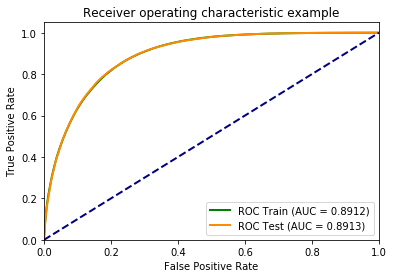

In [53]:
# Get score for training set & test set
train_test_model(clf_nb, x_train, target_train, x_test, target_test)

### Logistic Regression Classifier

In [54]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

clf_lrc = LogisticRegression()

clf_lrc.fit(x_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.919009  0.915228
Accuracy   0.839880  0.836122
Precision  0.822901  0.820203
Recall     0.850495  0.846383
f1-score   0.836471  0.833087


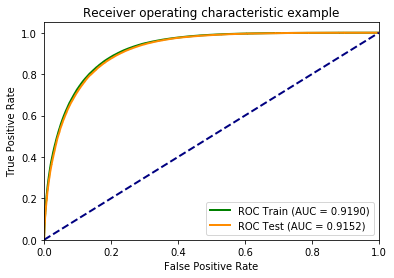

In [55]:
# Get score for training set & test set
train_test_model(clf_lrc, x_train, target_train, x_test, target_test)

#### Q: What are the key features(words) that make the positive prediction?

In [56]:
# Let's find it out by ranking
n = 20
get_top_values(clf_lrc.coef_[0], n, features_name)

[u'amazing',
 u'best',
 u'incredible',
 u'thank',
 u'heaven',
 u'awesome',
 u'phenomenal',
 u'delicious',
 u'perfect',
 u'highly',
 u'perfection',
 u'fantastic',
 u'excellent',
 u'favorite',
 u'great',
 u'love',
 u'outstanding',
 u'blown',
 u'omg',
 u'notch']

A: The top 20 words all positive adjective words. 

#### Q: What are the key features(words) that make the negative prediction?

In [57]:
# Let's find it out by ranking
n = 20
get_bottom_values(clf_lrc.coef_[0], n, features_name)

[u'worst',
 u'horrible',
 u'disappointing',
 u'mediocre',
 u'terrible',
 u'ok',
 u'bland',
 u'rude',
 u'lacked',
 u'okay',
 u'slow',
 u'lacking',
 u'poisoning',
 u'poor',
 u'disgusting',
 u'awful',
 u'meh',
 u'overpriced',
 u'worse',
 u'average']

A: all the words are negative adjective words. 

### Random Forest Classifier

In [58]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(max_depth=20, n_estimators=10, min_samples_leaf=100)

clf_rfc.fit(x_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.845068  0.842650
Accuracy   0.763442  0.762646
Precision  0.754446  0.754784
Recall     0.754176  0.753624
f1-score   0.754311  0.754204


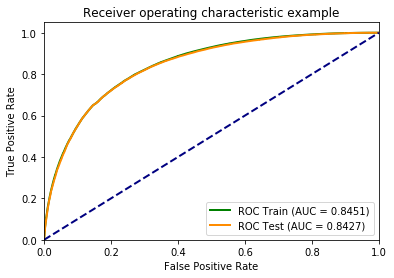

In [59]:
# Get score for training set & test set
train_test_model(clf_rfc, x_train, target_train, x_test, target_test)

#### Q: What do you see from the training score and the test score?

A: Comparing the three classifiers, random frost has lowest accuracy and AUC for both train/test data. For different metrics, the train metric and test metric are quite close.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [60]:
n = 20
get_top_values(clf_rfc.feature_importances_, n, features_name)

[u'amazing',
 u'best',
 u'bad',
 u'ok',
 u'good',
 u'great',
 u'worst',
 u'wasn',
 u'pretty',
 u'minutes',
 u'decent',
 u'delicious',
 u'highly',
 u'favorite',
 u'like',
 u'awesome',
 u'terrible',
 u'told',
 u'did',
 u'said']

Compared to Logistic regression results, top 20 features in RF are mix of positive words and negative words. it also have some neutral words like (hotel, money...)

## Additional Approach #1: Use cross validation to evaluate classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [61]:
# too slow, not used
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score,KFold
def get_scores(clf,X,y,num_folds=5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    accuracy_score = cross_val_score(clf, X, y, cv=num_folds,scoring='accuracy')
    auc_score = cross_val_score(clf, X, y, cv=num_folds,scoring='roc_auc')
    pre_score = cross_val_score(clf, X, y, cv=num_folds,scoring='precision')
    recall_score = cross_val_score(clf, X, y, cv=num_folds,scoring='recall')
    f1_score = cross_val_score(clf, X, y, cv=num_folds,scoring='f1')  
    metric_mean = [auc_score.mean(),accuracy_score.mean(),pre_score.mean(),recall_score.mean(),f1_score.mean()]
    metric_std = [auc_score.std(),accuracy_score.std(),pre_score.std(),recall_score.std(),f1_score.std()]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'cv_mean':metric_mean,
                                'cv_std':metric_std},columns=['metrics','cv_mean','cv_std']).set_index('metrics')
    print(all_metrics)

In [62]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
def get_scores(clf,X,y,num_folds=5):
    scoring = {'accuracy': make_scorer(accuracy_score),
               'prec': 'precision',
                'roc_auc': make_scorer(roc_auc_score),
                'recall': make_scorer(recall_score),
                'f1': make_scorer(f1_score)}
    cv_results = cross_validate(clf, X, y, scoring=scoring,cv=num_folds,return_train_score=False)
    return cv_results

In [63]:
cv_metrics_nb = get_scores(clf_nb,x_train,target_train,num_folds=5)

In [64]:
cv_metrics_lrc = get_scores(clf_lrc,x_train,target_train,num_folds=5)

In [65]:
cv_metrics_rfc = get_scores(clf_rfc,x_train,target_train,num_folds=5)

In [66]:
cv_metrics_nb

{'fit_time': array([75.22614813, 77.34347892, 77.56201291, 76.28931093, 74.19868112]),
 'score_time': array([9.52766085, 8.78242111, 9.25917506, 9.05888295, 8.30753183]),
 'test_accuracy': array([0.80784371, 0.80730693, 0.80846995, 0.80820156, 0.807685  ]),
 'test_f1': array([0.80693909, 0.80619946, 0.80796529, 0.8073852 , 0.80672968]),
 'test_prec': array([0.78156967, 0.7816112 , 0.78105354, 0.78167268, 0.78154737]),
 'test_recall': array([0.83401073, 0.83238498, 0.83679773, 0.83484683, 0.83358881]),
 'test_roc_auc': array([0.80877718, 0.80820155, 0.8094805 , 0.80915209, 0.80860935])}

In [72]:
cv_metrics_lrc

{'fit_time': array([70.90577221, 68.36279798, 73.9339211 , 76.92070007, 69.92208314]),
 'score_time': array([5.32232881, 6.10080814, 7.53891778, 6.04081583, 6.32297492]),
 'test_accuracy': array([0.83401176, 0.83441435, 0.83434725, 0.83327369, 0.83564263]),
 'test_f1': array([0.8306193 , 0.83051177, 0.83078399, 0.82949256, 0.83189788]),
 'test_prec': array([0.81648495, 0.81880558, 0.81747673, 0.81711054, 0.81955243]),
 'test_recall': array([0.84525164, 0.84255754, 0.84453167, 0.84225561, 0.84462096]),
 'test_roc_auc': array([0.83441273, 0.83470485, 0.83471057, 0.83359411, 0.83596302])}

In [73]:
cv_metrics_rfc

{'fit_time': array([174.62728906, 190.05464101, 178.25163102, 174.74052501,
        167.23038411]),
 'score_time': array([11.37148595, 11.65045285, 11.06738496, 10.6396389 , 10.68967199]),
 'test_accuracy': array([0.75833687, 0.7599584 , 0.76769699, 0.76869227, 0.76356784]),
 'test_f1': array([0.75610582, 0.75379374, 0.75552836, 0.75697904, 0.7575125 ]),
 'test_prec': array([0.73543812, 0.74466301, 0.76583003, 0.76599691, 0.74827789]),
 'test_recall': array([0.77796874, 0.76315117, 0.74550015, 0.74817103, 0.76697789]),
 'test_roc_auc': array([0.75903721, 0.7600723 , 0.76690515, 0.7679602 , 0.76368953])}

CV scores are lower than single train/test split, but the model performance ranking is consistent with previous results. Logistic regression classifier > naive bayes > random forest

## Additional Approach #2: Use grid methods to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

### Logistic Regression Classifier

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = LogisticRegression()

# Choose some parameter combinations to try
param_grid = {'penalty':['l1','l2'],
               'C':[0.5,1,5,10],
               'solver':['liblinear']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, target_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(x_train, target_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.918333  0.915067
Accuracy   0.839352  0.835880
Precision  0.822957  0.820760
Recall     0.849009  0.844846
f1-score   0.835780  0.832629


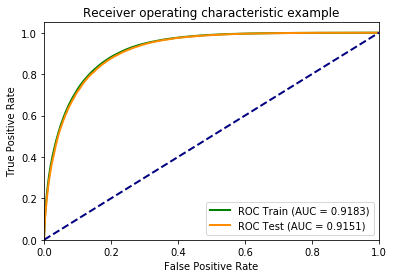

In [75]:
# Train test model
train_test_model(clf, x_train, target_train, x_test, target_test)

### Naive Bayes Classifier

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = MultinomialNB()

# Choose some parameter combinations to try
param_grid = {'alpha':[0.5,1,2]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, target_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(x_train, target_train)

MultinomialNB(alpha=2, class_prior=None, fit_prior=True)

              train      test
metrics                      
AUC        0.891343  0.891471
Accuracy   0.809617  0.809802
Precision  0.782690  0.783122
Recall     0.836992  0.838625
f1-score   0.808931  0.809924


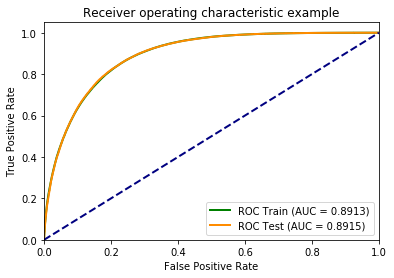

In [77]:
train_test_model(clf, x_train, target_train, x_test, target_test)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [8,16,32], 
              'min_samples_split': [5,10,20,60],
              'min_samples_leaf': [2,5,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, target_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(x_train, target_train)

In [ ]:
train_test_model(clf, x_train, target_train, x_test, target_test)

In [ ]:
print('hello world')